In [ ]:
import pandas as pd

In [35]:
train_data = pd.read_csv('./titanic/train.csv')

train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [37]:
train_data = train_data.dropna(subset=['Age'])
train_data = train_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
print(train_data.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

In [ ]:
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
train_data['Age'] = train_data['Age'].astype(int)

In [40]:
train_data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
Survived,1.000000,-0.359653,-0.077151,-0.017358,0.093317,0.268189,-0.538826,-0.049549,-0.156815
Pclass,-0.359653,1.000000,-0.369450,0.067247,0.025683,-0.554182,0.155460,0.132415,0.194935
Age,-0.077151,-0.369450,1.000000,-0.307947,-0.189307,0.096288,0.092753,-0.022858,-0.022454
SibSp,-0.017358,0.067247,-0.307947,1.000000,0.383820,0.138329,-0.103950,0.051619,0.018126
Parch,0.093317,0.025683,-0.189307,0.383820,1.000000,0.205119,-0.246972,-0.009126,0.012491
Fare,0.268189,-0.554182,0.096288,0.138329,0.205119,1.000000,-0.184994,-0.062765,-0.249353
Sex_male,-0.538826,0.155460,0.092753,-0.103950,-0.246972,-0.184994,1.000000,-0.026440,0.106796
Embarked_Q,-0.049549,0.132415,-0.022858,0.051619,-0.009126,-0.062765,-0.026440,1.000000,-0.378988
Embarked_S,-0.156815,0.194935,-0.022454,0.018126,0.012491,-0.249353,0.106796,-0.378988,1.000000


C:\Users\ual-laptop\AppData\Local\Temp\ipykernel_12864\640309297.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


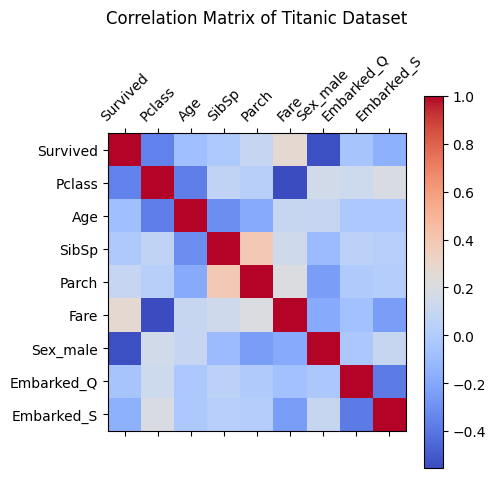

In [41]:
# make correlation matrix
corr_matrix = train_data.corr()
# plot the correlation matrix
plt.matshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix of Titanic Dataset', pad=20)
plt.tight_layout()


In [ ]:
X = train_data.drop(columns=['Survived'], axis=1) 
# X = train_data[['Age', 'Sex_male']]
y = train_data['Survived']               

In [43]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22,1,0,7.2500,True,False,True
1,1,38,1,0,71.2833,False,False,False
2,3,26,0,0,7.9250,False,False,True
3,1,35,1,0,53.1000,False,False,True
4,3,35,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...
885,3,39,0,5,29.1250,False,True,False
886,2,27,0,0,13.0000,True,False,True
887,1,19,0,0,30.0000,False,False,True
889,1,26,0,0,30.0000,True,False,False


Best parameters found:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 3}
Best model accuracy:  0.7202797202797203


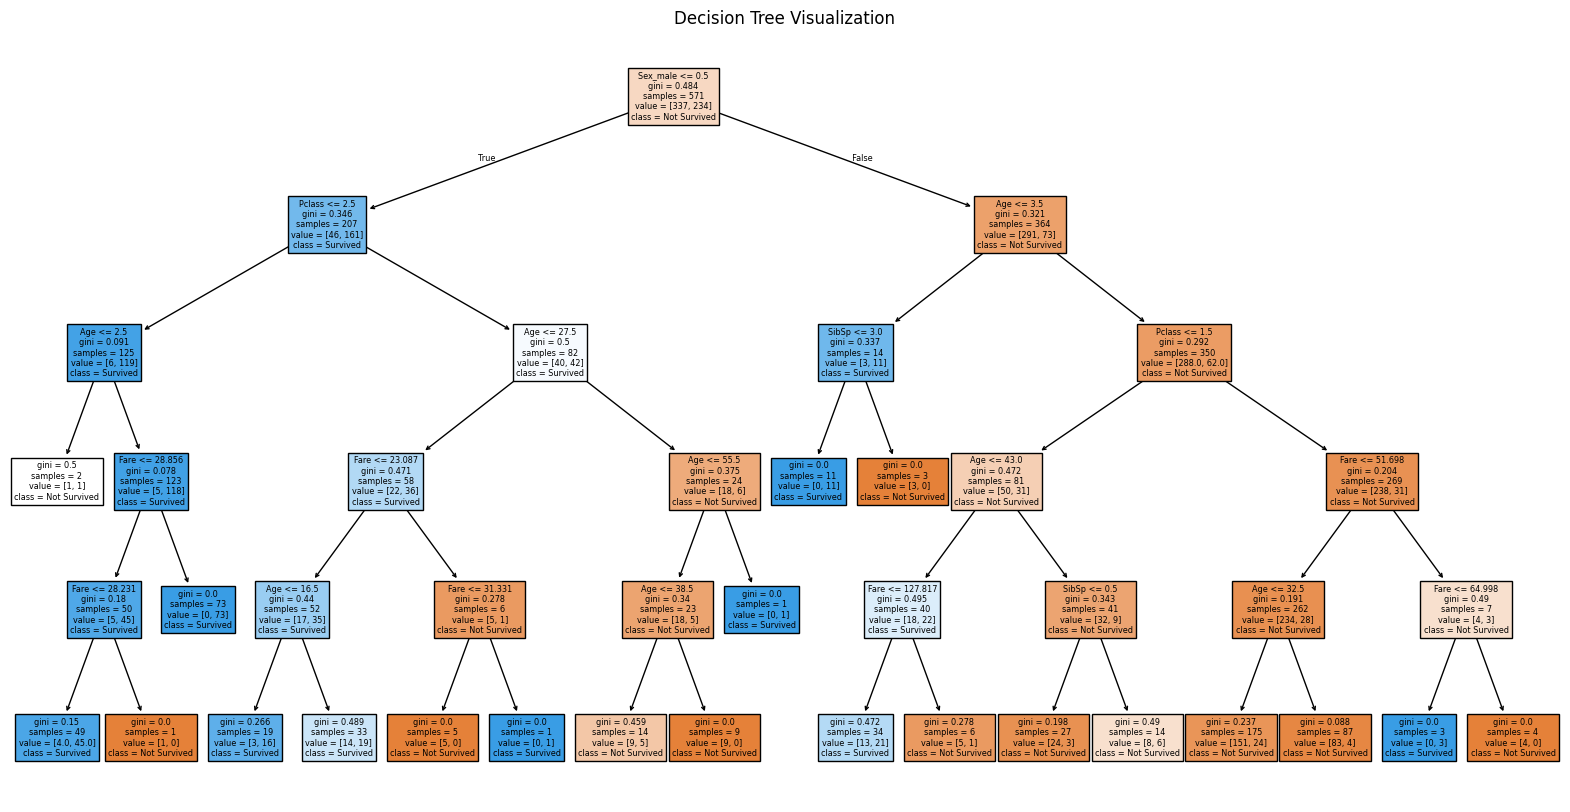

              precision    recall  f1-score   support

           0       0.78      0.75      0.76        87
           1       0.63      0.68      0.66        56

    accuracy                           0.72       143
   macro avg       0.71      0.71      0.71       143
weighted avg       0.72      0.72      0.72       143



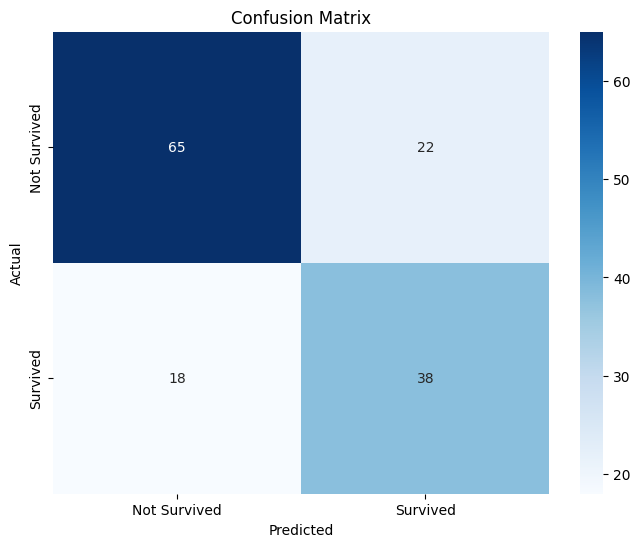

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


import seaborn as sns

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 40),
    'min_samples_split': range(2, 10)
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Best model accuracy: ", accuracy_score(y_test, y_pred))

# visualize the best decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.title('Decision Tree Visualization')
plt.show()

# print classification report
print(classification_report(y_test, y_pred))

# print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [45]:
submission_data = pd.read_csv('./titanic/test.csv')

submission_data = submission_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
submission_data['Age'] = submission_data['Age'].fillna(submission_data['Age'].mean())
submission_data['Fare'] = submission_data['Fare'].fillna(submission_data['Fare'].mean())
print(submission_data.isnull().sum()) 

submission_data.shape

submission_data = pd.get_dummies(submission_data, columns=["Sex", "Embarked"], drop_first=True)
submission_data['Age'] = submission_data['Age'].astype(int)
X_submission = submission_data

y_submission = best_model.predict(X_submission)
submission_df = pd.DataFrame({
    'PassengerId': submission_data.index + 892,  # Bcoz passenderId starts from 892 in data set
    'Survived': y_submission
})


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [46]:
submission_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [47]:
submission_df.to_csv('submission.csv', index=False)